In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.utils.vis_utils import plot_model


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [12]:


#import data to df
df = pd.read_csv('MARKETING_CUSTOMER_DEMOGRAPHICS_UIG.csv')


In [13]:


#in some columns, replace blanks with no
df['HOH'] = df['HOH'].replace('', 'N')
df['SUBFAMILYINDICATOR'] = df['SUBFAMILYINDICATOR'].replace('', 'N')
df['POOL'] = df['POOL'].replace('', 'N')
df['REGISTEREDVOTER'] = df['REGISTEREDVOTER'].replace('', 'N')
df['POLITICALPARTY'] = df['POLITICALPARTY'].replace('', 'N')
df['COUNTRYOFORIGIN'] = df['COUNTRYOFORIGIN'].replace('', "US")
df['LOTSIZE'] = df['LOTSIZE'].replace('', 0)
df['HOMESIZE'] = df['HOMESIZE'].replace('', 0)
df['CITY']  = df['CITY'].replace('', 'UNKNOWN')
df['STATE'] = df['STATE'].replace('', 'UNKNOWN')
df['NUMBEROFADULTS'] = df['NUMBEROFADULTS'].replace('', 0)

df.fillna(0, inplace=True)
df.dropna(inplace=True)

df = df.drop('INDIVIDUALID', axis=1)

#split df into two dataframes due to size issues
df = df.sample(frac=0.05)

In [14]:
# encode the data with pandas get_dummies
df = pd.get_dummies(df, columns=['GENDER', 'AGECODE', 'MARITALSTATUS', 'INCOME', 'LOCATIONTYPE', 'HOMEVALUE', 'MARITALSTATUS', 'EXPENDABLEINCOMERANK', 'SUBFAMILYINDICATOR', "HOH", 'REGISTEREDVOTER', 'POLITICALPARTY', 'CITY', 'STATE', "POOL", 'HOMEEQUITYESTIMATE','WEALTHFINDER', 'DONOTCALLFLAG', 'COUNTRYOFORIGIN'], dtype=int, sparse=True)

df['SOLD'] = df['SOLD'].apply(lambda x: 0 if x == 0 else 1)

sold = df['SOLD']

df.drop('SOLD', axis=1, inplace=True)



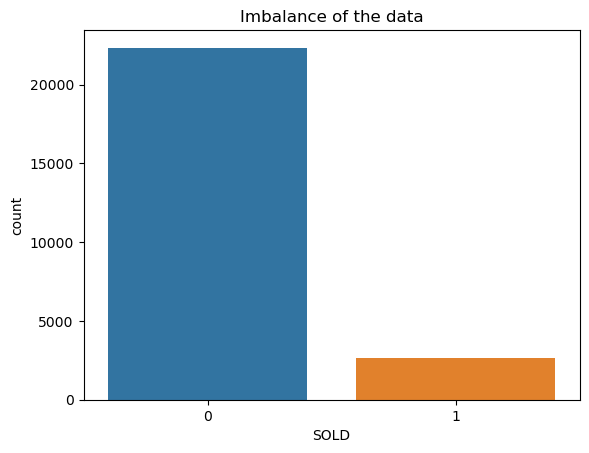

In [15]:
#explore the data

#plot the imbalance of the data using seaborn
sns.countplot(x=sold, data=df)
plt.title('Imbalance of the data')
plt.savefig('imbalance.png')

/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


((30002, 3727), (8245, 3727), (30002,), (8245,))

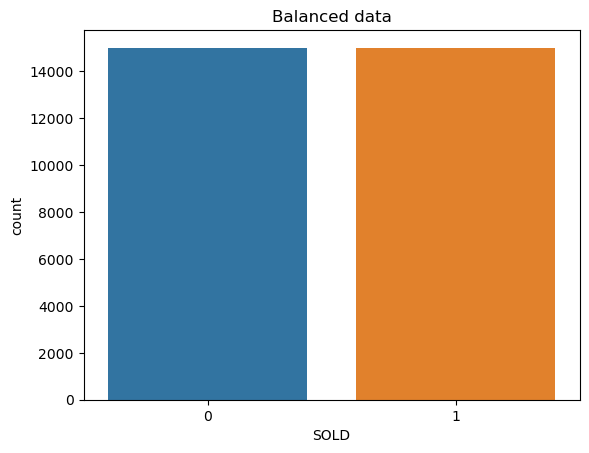

In [16]:

X_train, X_test, y_train, y_test = train_test_split(df, sold, test_size=0.33, random_state=42)

#smote to balance the data

sm = RandomOverSampler(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#show the balanced data
sns.countplot(x=y_train, data=X_train)
plt.title('Balanced data')
plt.savefig('balanced.png')

standard_scaler = StandardScaler().set_output(transform='pandas')
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [17]:
metrics = [
    'accuracy',
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]



# # Create a model
model = Sequential()
model.add(Dense(32, activation='relu',     
    ))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',     
    ))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',     
    ))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',     
    ))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',     
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
    ))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

#create a callback

checkpoint_path = 'best_model.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_best_only=True, monitor='val_loss', mode='min')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Fit the model and validate
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=1,
                    use_multiprocessing=True, workers=12, 
                    callbacks=[checkpoint, early_stop],
                    validation_data=(X_test, y_test))


Epoch 1/1000
1876/1876 [==============================] - 18s 9ms/step - loss: 0.6144 - accuracy: 0.6359 - fn: 2766.0000 - fp: 8157.0000 - tn: 6844.0000 - tp: 12235.0000 - precision: 0.6000 - recall: 0.8156 - val_loss: 0.9093 - val_accuracy: 0.2033 - val_fn: 61.0000 - val_fp: 6508.0000 - val_tn: 838.0000 - val_tp: 838.0000 - val_precision: 0.1141 - val_recall: 0.9321
Epoch 2/1000
1876/1876 [==============================] - 15s 8ms/step - loss: 0.5551 - accuracy: 0.6988 - fn: 1627.0000 - fp: 7411.0000 - tn: 7590.0000 - tp: 13374.0000 - precision: 0.6434 - recall: 0.8915 - val_loss: 0.8639 - val_accuracy: 0.3105 - val_fn: 132.0000 - val_fp: 5553.0000 - val_tn: 1793.0000 - val_tp: 767.0000 - val_precision: 0.1214 - val_recall: 0.8532
Epoch 3/1000
1876/1876 [==============================] - 16s 8ms/step - loss: 0.4968 - accuracy: 0.7503 - fn: 1941.0000 - fp: 5550.0000 - tn: 9451.0000 - tp: 13060.0000 - precision: 0.7018 - recall: 0.8706 - val_loss: 0.8505 - val_accuracy: 0.3572 - val_fn:

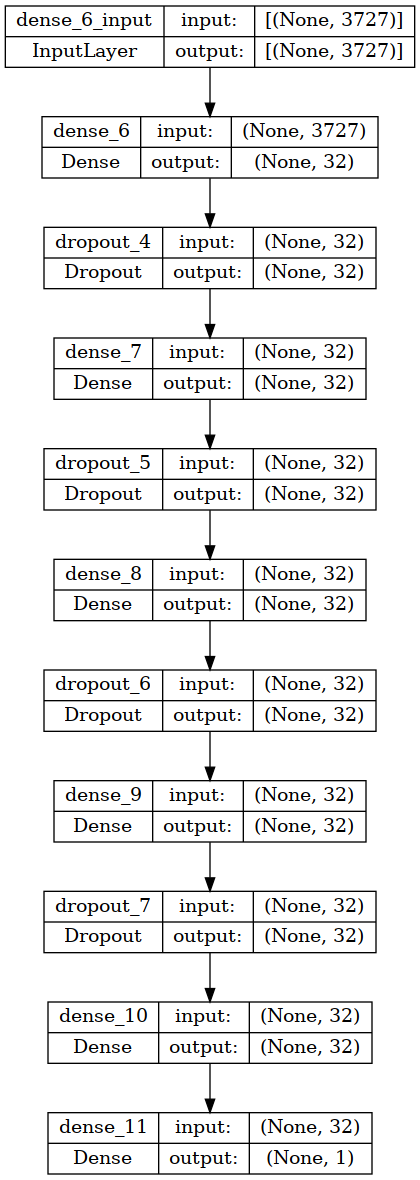

In [18]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

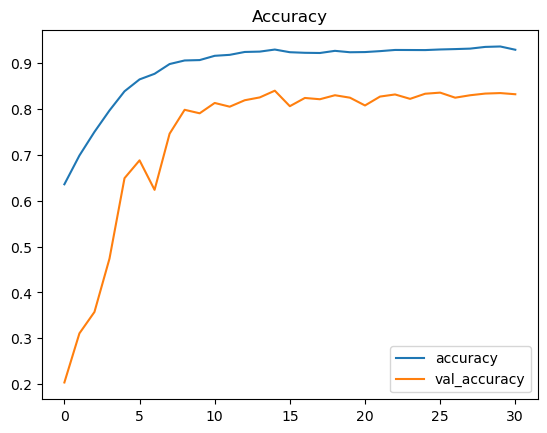

In [19]:
# Plot the accuracy in seaborn
fig, ax = plt.subplots()

sns.lineplot(data=history.history['accuracy'], label='accuracy', ax=ax)
sns.lineplot(data=history.history['val_accuracy'], label='val_accuracy', ax=ax)

plt.title('Accuracy')
plt.savefig('accuracy.png')

/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pratik/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

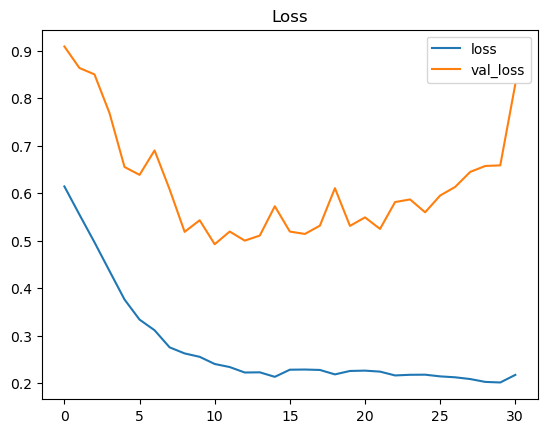

In [20]:
# Plot the accuracy in seaborn
fig, ax = plt.subplots()

sns.lineplot(data=history.history['loss'], label='loss', ax=ax)
sns.lineplot(data=history.history['val_loss'], label='val_loss', ax=ax)

plt.title('Loss')
plt.savefig('model_loss.png')